## Problem Statement :- E-Commerce Product Pricing Optimization
The goal is to find the right price point for each product that maximizes revenue while considering factors such as demand, competition, and historical sales data.

# Step 1: Import Libraries

In [712]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_squared_error


# Step 2: Gather Data 

In [713]:
df1 = pd.read_csv(R"C:\Users\Kaustubh Shinde\OneDrive\Desktop\Capstone1_Product Pricing\summer-products-2020-08.csv")
df1.head(10)

,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
5,5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,...,10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08
7,7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,EUR,1000,0,3.76,286,...,342,3.681287,5d45349676befe65691dcfbb,0,NaN,https://www.wish.com/c/5e0ae5ebc2efb76ccf0a3391,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,summer,2020-08
8,8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,EUR,100,1,3.47,15,...,330,3.803030,5d42980e8388970d32294ddc,0,NaN,https://www.wish.com/c/5e6f1fb7fe4a5bb4b8bf36e5,https://contestimg.wish.com/api/webimage/5e6f1...,5e6f1fb7fe4a5bb4b8bf36e5,summer,2020-08
9,9,"Femmes d'été, plus la taille décontractée lâch...",Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,EUR,5000,0,3.60,687,...,5534,3.999819,5ba2251b4315d12ebce873fa,0,NaN,https://www.wish.com/c/5ccfaf238a8d535cec2dfb47,https://contestimg.wish.com/api/webimage/5ccfa...,5ccfaf238a8d535cec2dfb47,summer,2020-08


In [714]:
df2 = pd.read_csv(R"C:\Users\Kaustubh Shinde\OneDrive\Desktop\Capstone1_Product Pricing\Success of active sellers.csv")
df2.head(10)

,index,merchant_id,averagediscount
0,0,5357bcf2bb72c5504882e889,54
1,1,5708773c3c02161b3f8c7900,61
2,2,5417aada4ad3ab27e954b76c,-1
3,3,570f3a713a698c14278bb51e,71
4,4,53082ea15aefb07dfe1f2a4f,85
5,5,53f2beb39020ee03566d6e18,88
6,6,5926c5ace8ff5525241b368d,-4
7,7,5860c757b1e41d4d67d183e8,11
8,8,52bd3ddb34067e4620a4c62d,33
9,9,5a7b23a69bda4e3d375e7b3f,-7


In [715]:
df = pd.merge(df1, df2, on="merchant_id")
df.head(10)

,index_x,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,index_y,averagediscount
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,822,-14
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,65,38
2,983,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,4.90,8,EUR,1000,1,3.83,99,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5df2576d68963c1660471f9a,https://contestimg.wish.com/api/webimage/5df25...,5df2576d68963c1660471f9a,summer,2020-08,65,38
3,1160,Summer Women s Fashion Lace Up Tie Pants Plus...,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,EUR,100,0,3.77,47,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5d58daef3159a812b05933d2,https://contestimg.wish.com/api/webimage/5d58d...,5d58daef3159a812b05933d2,summer,2020-08,65,38
4,1223,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,5.65,10,EUR,100,1,2.86,7,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5e9fa7de39682a0043ab7898,https://contestimg.wish.com/api/webimage/5e9fa...,5e9fa7de39682a0043ab7898,summer,2020-08,65,38
5,1273,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,5.65,10,EUR,100,1,2.86,7,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5e9fa7de39682a0043ab7898,https://contestimg.wish.com/api/webimage/5e9fa...,5e9fa7de39682a0043ab7898,summer,2020-08,65,38
6,1562,Summer Women s Fashion Lace Up Tie Pants Plus...,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,EUR,100,0,3.77,47,...,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5d58daef3159a812b05933d2,https://contestimg.wish.com/api/webimage/5d58d...,5d58daef3159a812b05933d2,summer,2020-08,65,38
7,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,702,88
8,112,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.00,0,...,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08,702,88
9,447,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.00,0,...,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08,702,88


In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index_x                       1573 non-null   int64  
 1   title                         1573 non-null   object 
 2   title_orig                    1573 non-null   object 
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   currency_buyer                1573 non-null   object 
 6   units_sold                    1573 non-null   int64  
 7   uses_ad_boosts                1573 non-null   int64  
 8   rating                        1573 non-null   float64
 9   rating_count                  1573 non-null   int64  
 10  rating_five_count             1528 non-null   float64
 11  rating_four_count             1528 non-null   float64
 12  rating_three_count            1528 non-null   float64
 13  rat

 # Step 3: Data Preprocessing

## Missing Value Treatment:

In [717]:
df.isnull().sum()

index_x                            0
title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
u

In [718]:
(df.isnull().sum() / len(df)) * 100

index_x                          0.000000
title                            0.000000
title_orig                       0.000000
price                            0.000000
retail_price                     0.000000
currency_buyer                   0.000000
units_sold                       0.000000
uses_ad_boosts                   0.000000
rating                           0.000000
rating_count                     0.000000
rating_five_count                2.860776
rating_four_count                2.860776
rating_three_count               2.860776
rating_two_count                 2.860776
rating_one_count                 2.860776
badges_count                     0.000000
badge_local_product              0.000000
badge_product_quality            0.000000
badge_fast_shipping              0.000000
tags                             0.000000
product_color                    2.606484
shipping_option_name             0.000000
shipping_option_price            0.000000
shipping_is_express              0

In [719]:
## Column : merchant_profile_picture

In [720]:
df['merchant_profile_picture'].unique()        

array([nan,
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_580f06685250a20783d33e56.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg'

In [721]:
df['merchant_profile_picture'].dtype

dtype('O')

In [722]:
df.drop('merchant_profile_picture', axis=1, inplace=True)

In [723]:
## Column : has_urgency_banner

In [724]:
df['has_urgency_banner'].unique()

array([ 1., nan])

In [725]:
df['has_urgency_banner'].dtype

dtype('float64')

In [726]:
df['has_urgency_banner'].fillna(0,inplace=True)

In [727]:
## Column : urgency_text 

In [728]:
df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [729]:
df['urgency_text'].dtype

dtype('O')

In [730]:
df.drop('urgency_text', axis=1, inplace=True)

In [731]:
## Column : rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count

In [732]:
df['rating_five_count'].unique()

array([2.6000e+01, 2.2690e+03, 4.3000e+01, 2.2000e+01, 1.0000e+00,
       5.0000e+00,        nan, 2.9500e+02, 2.0000e+00, 7.7000e+01,
       6.0000e+00, 6.0300e+02, 3.1720e+03, 1.2000e+02, 2.8700e+02,
       3.0400e+02, 1.0090e+03, 2.8800e+02, 2.4500e+02, 2.9000e+01,
       1.2000e+01, 3.0000e+00, 4.9000e+01, 3.6000e+01, 3.5800e+02,
       9.8400e+02, 7.0200e+02, 6.3000e+01, 6.6200e+02, 1.9750e+03,
       7.3500e+02, 2.0400e+02, 1.5500e+02, 1.0700e+03, 3.8100e+02,
       8.4000e+02, 8.2900e+03, 9.0000e+00, 1.8900e+02, 9.1000e+01,
       5.9100e+02, 2.4560e+03, 8.7000e+01, 1.3700e+02, 5.0600e+02,
       1.4370e+03, 8.2000e+01, 2.7000e+01, 7.9000e+01, 2.1300e+02,
       1.3800e+02, 5.9700e+02, 1.1160e+03, 2.9000e+02, 3.6500e+02,
       4.0000e+00, 1.9000e+01, 2.8600e+02, 1.7300e+02, 3.2300e+02,
       2.5000e+01, 1.0500e+02, 1.7810e+03, 1.1000e+01, 7.0000e+00,
       1.3300e+02, 1.5600e+02, 1.4800e+02, 1.7000e+01, 1.9000e+02,
       7.5300e+03, 2.6350e+03, 2.1500e+02, 3.8400e+02, 4.1800e

In [733]:
df['rating_four_count'].unique()

array([8.000e+00, 1.027e+03, 1.800e+01, 7.000e+00, 1.000e+00, 4.000e+00,
             nan, 1.190e+02, 2.000e+00, 1.400e+01, 3.210e+02, 0.000e+00,
       1.352e+03, 5.600e+01, 1.280e+02, 1.120e+02, 3.990e+02, 1.010e+02,
       1.700e+01, 2.900e+01, 2.400e+01, 1.690e+02, 4.810e+02, 3.390e+02,
       3.300e+01, 3.280e+02, 7.930e+02, 2.500e+02, 9.400e+01, 6.500e+01,
       4.600e+02, 1.340e+02, 4.350e+02, 3.483e+03, 3.000e+00, 1.020e+02,
       3.900e+01, 3.080e+02, 1.162e+03, 3.600e+01, 6.400e+01, 2.740e+02,
       6.320e+02, 2.700e+01, 1.100e+01, 2.500e+01, 1.600e+01, 9.800e+01,
       5.000e+01, 1.640e+02, 3.570e+02, 1.450e+02, 1.090e+02, 9.000e+01,
       4.600e+01, 1.160e+02, 4.800e+01, 6.280e+02, 4.500e+01, 7.000e+01,
       5.900e+01, 8.300e+01, 3.351e+03, 1.394e+03, 4.200e+01, 7.600e+01,
       1.460e+02, 1.870e+02, 2.400e+02, 1.700e+02, 2.600e+01, 5.000e+00,
       1.300e+01, 4.700e+01, 3.760e+02, 4.170e+02, 8.700e+01, 1.172e+03,
       6.000e+00, 6.070e+02, 1.650e+02, 2.890e+02, 

In [734]:
df['rating_three_count'].unique()

array([1.000e+01, 1.118e+03, 2.300e+01, 8.000e+00, 2.000e+00,       nan,
       8.700e+01, 0.000e+00, 1.100e+01, 3.430e+02, 9.710e+02, 6.100e+01,
       3.000e+00, 9.200e+01, 8.600e+01, 3.000e+02, 1.190e+02, 8.100e+01,
       1.900e+01, 2.400e+01, 1.470e+02, 4.590e+02, 2.720e+02, 2.520e+02,
       6.820e+02, 1.070e+02, 6.200e+01, 5.100e+01, 3.730e+02, 1.100e+02,
       3.860e+02, 2.951e+03, 4.000e+00, 5.500e+01, 2.800e+01, 2.750e+02,
       8.530e+02, 4.900e+01, 6.900e+01, 2.160e+02, 6.100e+02, 1.400e+01,
       8.500e+01, 2.600e+01, 8.400e+01, 1.040e+02, 7.300e+01, 1.000e+00,
       1.700e+01, 7.800e+01, 1.800e+01, 5.800e+01, 6.000e+00, 3.900e+01,
       3.740e+02, 5.200e+01, 3.400e+01, 3.800e+01, 4.800e+01, 3.057e+03,
       1.315e+03, 6.500e+01, 1.580e+02, 2.010e+02, 2.110e+02, 5.000e+00,
       3.310e+02, 6.000e+01, 6.500e+02, 1.200e+01, 5.580e+02, 1.200e+02,
       3.440e+02, 1.140e+02, 1.330e+02, 1.390e+02, 3.500e+01, 9.000e+00,
       4.200e+01, 1.260e+02, 2.380e+02, 1.370e+02, 

In [735]:
df['rating_two_count'].unique()

array([1.000e+00, 6.440e+02, 8.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
             nan, 4.200e+01, 2.630e+02, 4.900e+02, 1.800e+01, 6.800e+01,
       3.600e+01, 1.430e+02, 6.200e+01, 6.100e+01, 1.700e+01, 1.400e+01,
       1.900e+01, 6.400e+01, 2.060e+02, 1.440e+02, 1.100e+01, 1.290e+02,
       3.970e+02, 2.300e+01, 2.100e+01, 2.500e+01, 1.810e+02, 6.600e+01,
       1.580e+02, 1.410e+03, 3.100e+01, 3.000e+00, 1.150e+02, 4.310e+02,
       4.000e+01, 8.100e+01, 3.580e+02, 7.000e+00, 4.000e+00, 6.000e+00,
       4.500e+01, 9.000e+00, 1.420e+02, 3.300e+01, 1.500e+01, 2.800e+01,
       1.200e+01, 1.040e+02, 2.900e+01, 1.300e+01, 1.736e+03, 7.150e+02,
       9.800e+01, 1.330e+02, 8.700e+01, 1.280e+02, 1.000e+01, 1.120e+02,
       1.940e+02, 2.040e+02, 2.410e+02, 5.100e+01, 1.890e+02, 4.400e+01,
       9.700e+01, 2.600e+01, 5.200e+01, 1.000e+02, 5.900e+01, 4.600e+01,
       8.800e+01, 2.840e+02, 8.900e+01, 1.360e+02, 1.010e+02, 1.470e+02,
       1.510e+02, 3.800e+01, 2.030e+02, 5.400e+01, 

In [736]:
df['rating_one_count'].unique()

array([9.000e+00, 1.077e+03, 7.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
             nan, 3.600e+01, 1.000e+01, 6.000e+00, 6.610e+02, 0.000e+00,
       7.570e+02, 3.100e+01, 1.120e+02, 5.800e+01, 2.410e+02, 1.070e+02,
       1.250e+02, 4.500e+01, 2.500e+01, 1.900e+01, 1.180e+02, 3.270e+02,
       2.540e+02, 1.750e+02, 5.200e+02, 3.800e+01, 6.100e+01, 3.570e+02,
       7.900e+01, 2.390e+02, 1.846e+03, 2.000e+00, 1.550e+02, 5.770e+02,
       1.060e+02, 5.150e+02, 1.200e+01, 1.500e+01, 6.900e+01, 1.400e+01,
       6.600e+01, 2.360e+02, 7.800e+01, 6.300e+01, 5.900e+01, 4.200e+01,
       1.090e+02, 3.700e+01, 2.300e+01, 2.789e+03, 1.029e+03, 2.560e+02,
       1.970e+02, 1.380e+02, 2.440e+02, 1.800e+01, 4.000e+00, 2.100e+01,
       2.090e+02, 3.160e+02, 4.700e+01, 2.220e+02, 3.350e+02, 6.800e+01,
       4.260e+02, 2.010e+02, 1.220e+02, 8.000e+00, 3.300e+01, 1.310e+02,
       8.500e+01, 9.000e+01, 1.570e+02, 6.200e+01, 5.300e+01, 3.060e+02,
       1.700e+01, 1.440e+02, 2.070e+02, 2.900e+01, 

In [737]:
df.fillna(value={'rating_five_count': 0,
                 'rating_four_count': 0, 
                 'rating_three_count': 0,
                 'rating_two_count': 0,
                 'rating_one_count': 0}, inplace=True)

In [738]:
## Column: product_color                    

In [739]:
df['product_color'].unique()

array(['white', 'green', 'red', 'black', 'leopardprint', 'blue', 'purple',
       'yellow', 'navyblue', 'beige', 'rosered', 'grey', 'claret',
       'lightblue', 'orange', 'pink', 'black & green', 'lightyellow',
       'Black', 'navy', 'winered', 'armygreen', 'khaki', nan,
       'red & blue', 'coffee', 'multicolor', 'blue & pink', 'floral',
       'RED', 'coolblack', 'white & green', 'navy blue', 'nude',
       'whitefloral', 'dustypink', 'skyblue', 'black & white',
       'fluorescentgreen', 'gray', 'orange & camouflage', 'camouflage',
       'brown', 'lightpink', 'pink & black', 'white & red', 'silver',
       'Army green', 'lightgreen', 'mintgreen', 'pink & grey', 'wine',
       'rose', 'light green', 'leopard', 'orange-red', 'gray & white',
       'White', 'Pink', 'watermelonred', 'Blue', 'star', 'white & black',
       'apricot', 'burgundy', 'wine red', 'pink & white', 'offwhite',
       'blackwhite', 'tan', 'lightred', 'black & blue', 'coralred',
       'lakeblue', 'darkblue', '

In [740]:
df.drop('product_color', axis=1, inplace=True)

In [741]:
## Column: origin_country                    

In [742]:
df['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [743]:
df['origin_country'].fillna(df['origin_country'].mode()[0], inplace=True)

In [744]:
df['origin_country'].unique()

array(['CN', 'US', 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [745]:
## Column: merchant_name

In [746]:
df['merchant_name'].unique()

array(['zgrdejia', 'sarahouse', 'hxt520', 'allenfan', 'happyhorses',
       'zhoulinglinga',
       'uniquelifashionshopbb657bfe91d211e598c7063a14dc88b5', 'soband',
       'chenxiangjunjun', 'luoweiclothe', 'mayuhiao', 'lanniesdesign',
       'easymarket', 'molesfashion', 'pentiumhorse', 'pethasboutique',
       '2312hangm', 'leiston', 'centper3', 'chenqinq',
       'hongkonghaijietradecolimited', 'ouchocoltd', 'huaxianglarou',
       'purefashionltd', 'sjhdstoer', 'terbuer', 'coaluss',
       'happyshoooping', 'memo2', 'meiximeiyo', 'hotdress',
       'newfashionshoppingpark', 'kallyett', 'maxgoods', 'sangboostore',
       'linfashionstore', 'unnistore', 'cuetaes', '广州乔莎服饰有限公司', 'wenj498',
       'baijupingshop', 'wuewi', 'brittany', 'qiaopiaduxiu', 'knights',
       'fengjinying', 'enjoythesunshine', 'chentengying', 'gettrendy',
       'floraboutique', 'cyb654', 'wowbang', 'nalininternational',
       'maryswill', '泷翔', 'zhuangyuping1', 'zanzeaofficialstore',
       'caishuiwang', 'z

In [747]:
df.drop('merchant_name', axis=1, inplace=True)

In [748]:
## Column: merchant_info_subtitle

In [749]:
df['merchant_info_subtitle'].unique()

array(['(568 notes)', '83 % avis positifs (17,752 notes)',
       '83% Positive Feedback (17,752 ratings)', ...,
       '75 % avis positifs (265 notes)', '86 % avis positifs (210 notes)',
       '90 % avis positifs (7,023 notes)'], dtype=object)

In [750]:
df.drop('merchant_info_subtitle', axis=1, inplace=True)

In [751]:
df.isnull().sum()

index_x                         0
title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_title                  0
merchant_rating_count           0
merchant_ratin

## Typecasting:
Convert all float data to int

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index_x                       1573 non-null   int64  
 1   title                         1573 non-null   object 
 2   title_orig                    1573 non-null   object 
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   currency_buyer                1573 non-null   object 
 6   units_sold                    1573 non-null   int64  
 7   uses_ad_boosts                1573 non-null   int64  
 8   rating                        1573 non-null   float64
 9   rating_count                  1573 non-null   int64  
 10  rating_five_count             1573 non-null   float64
 11  rating_four_count             1573 non-null   float64
 12  rating_three_count            1573 non-null   float64
 13  rat

In [753]:
df = df.astype({"price":'int64',
                "rating":'int64',
                "rating_five_count":'int64',
                "rating_four_count":'int64',
                "rating_three_count":'int64',
                "rating_two_count":'int64',
                "rating_one_count":'int64',
                "has_urgency_banner":'int64',
                "merchant_rating":'int64'})

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   index_x                       1573 non-null   int64 
 1   title                         1573 non-null   object
 2   title_orig                    1573 non-null   object
 3   price                         1573 non-null   int64 
 4   retail_price                  1573 non-null   int64 
 5   currency_buyer                1573 non-null   object
 6   units_sold                    1573 non-null   int64 
 7   uses_ad_boosts                1573 non-null   int64 
 8   rating                        1573 non-null   int64 
 9   rating_count                  1573 non-null   int64 
 10  rating_five_count             1573 non-null   int64 
 11  rating_four_count             1573 non-null   int64 
 12  rating_three_count            1573 non-null   int64 
 13  rating_two_count  

## Delete unwanted columns:

In [755]:
df.columns

Index(['index_x', 'title', 'title_orig', 'price', 'retail_price',
       'currency_buyer', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_url',
       'product_picture', 'product_id', 'theme', 'crawl_month', 'index_y',
       'averagediscount'],
      dtype='object')

In [756]:
df.drop(['index_x', 'title','currency_buyer', 'tags', 'merchant_has_profile_picture','product_url', 
         'product_picture', 'theme', 'index_y'], 
        axis=1, inplace=True)

In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title_orig             1573 non-null   object
 1   price                  1573 non-null   int64 
 2   retail_price           1573 non-null   int64 
 3   units_sold             1573 non-null   int64 
 4   uses_ad_boosts         1573 non-null   int64 
 5   rating                 1573 non-null   int64 
 6   rating_count           1573 non-null   int64 
 7   rating_five_count      1573 non-null   int64 
 8   rating_four_count      1573 non-null   int64 
 9   rating_three_count     1573 non-null   int64 
 10  rating_two_count       1573 non-null   int64 
 11  rating_one_count       1573 non-null   int64 
 12  badges_count           1573 non-null   int64 
 13  badge_local_product    1573 non-null   int64 
 14  badge_product_quality  1573 non-null   int64 
 15  badge_fast_shipping  

## Remove duplicates:

In [758]:
df.shape

(1573, 30)

In [759]:
df.duplicated().sum()

34

In [760]:
df = df.drop_duplicates()
df.shape

(1539, 30)

## Encoding:
Converting all Object and Categorical(Nominal & Ordinal) data to numeric

*Object:-
Find number of unique for all object columns
Delete columns which have 1 unique or big number of unique

*Nominal Categorical:-
One Hot Encoding

In [761]:
df.select_dtypes('O').columns

Index(['title_orig', 'shipping_option_name', 'origin_country',
       'merchant_title', 'merchant_id', 'product_id', 'crawl_month'],
      dtype='object')

In [762]:
for i in df.select_dtypes('O').columns:
    print(f'{i} : {df[i].nunique()}')

title_orig : 1203
shipping_option_name : 15
origin_country : 6
merchant_title : 958
merchant_id : 958
product_id : 1341
crawl_month : 1


In [763]:
df.drop(['title_orig', 'merchant_title', 'merchant_id', 'product_id', 'crawl_month'],axis = 1, inplace=True)

In [764]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Standard Shipping', 'Envio Padrão',
       'Стандартная доставка', 'Standart Gönderi', 'การส่งสินค้ามาตรฐาน',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Spedizione standard', 'Ekspresowa wysyłka'],
      dtype=object)

In [765]:
df.drop(['shipping_option_name'],axis = 1, inplace=True)

In [766]:
df['origin_country'].unique()

array(['CN', 'US', 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [767]:
encoded_df = pd.get_dummies(df,drop_first=True,dtype=int)
encoded_df.head(10)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,averagediscount,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,16,14,100,0,3,54,26,8,10,1,...,50,1,568,4,-14,1,0,0,0,0
1,8,22,20000,1,3,6135,2269,1027,1118,644,...,50,1,17752,3,38,1,0,0,0,0
2,4,8,1000,1,3,99,43,18,23,8,...,50,0,17752,3,38,1,0,0,0,0
3,4,6,100,0,3,47,22,7,8,5,...,50,1,17752,3,38,1,0,0,0,0
4,5,10,100,1,2,7,1,1,2,2,...,50,0,17752,3,38,1,0,0,0,0
5,5,10,100,1,2,7,1,1,2,2,...,50,1,17752,3,38,1,0,0,0,0
6,4,6,100,0,3,47,22,7,8,5,...,50,0,17752,3,38,1,0,0,0,0
7,8,43,100,0,3,14,5,4,2,0,...,50,1,295,3,88,1,0,0,0,0
8,5,51,10,0,5,0,0,0,0,0,...,50,0,295,3,88,1,0,0,0,0
10,8,8,5000,1,4,579,295,119,87,42,...,50,0,23832,4,7,1,0,0,0,0


In [768]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   price                  1539 non-null   int64
 1   retail_price           1539 non-null   int64
 2   units_sold             1539 non-null   int64
 3   uses_ad_boosts         1539 non-null   int64
 4   rating                 1539 non-null   int64
 5   rating_count           1539 non-null   int64
 6   rating_five_count      1539 non-null   int64
 7   rating_four_count      1539 non-null   int64
 8   rating_three_count     1539 non-null   int64
 9   rating_two_count       1539 non-null   int64
 10  rating_one_count       1539 non-null   int64
 11  badges_count           1539 non-null   int64
 12  badge_local_product    1539 non-null   int64
 13  badge_product_quality  1539 non-null   int64
 14  badge_fast_shipping    1539 non-null   int64
 15  shipping_option_price  1539 non-null  

# Step 4: Static Sumaary 

In [769]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,averagediscount
count,1539.00000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,...,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1.539000e+03,1539.000000,1539.000000
mean,8.22872,23.317089,4422.480182,0.435997,3.377518,907.372320,438.144899,177.922027,133.320338,63.133853,...,0.074074,0.012995,2.356725,0.002599,40.450942,49.817414,0.304094,2.677209e+04,3.597141,26.458739
std,4.07596,30.309642,9438.316389,0.496048,0.643898,2001.720315,977.595368,399.443707,310.838184,150.931956,...,0.261977,0.113291,1.026679,0.050932,20.137709,2.590833,0.460172,7.919141e+04,0.494592,38.011070
min,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.000000,-18.000000
25%,5.00000,7.000000,100.000000,0.000000,3.000000,26.000000,11.000000,4.500000,4.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,31.000000,50.000000,0.000000,2.052500e+03,3.000000,-9.000000
50%,8.00000,10.000000,1000.000000,0.000000,3.000000,161.000000,77.000000,30.000000,23.000000,11.000000,...,0.000000,0.000000,2.000000,0.000000,40.000000,50.000000,0.000000,8.197000e+03,4.000000,14.000000
75%,11.00000,26.000000,5000.000000,1.000000,4.000000,873.000000,401.000000,167.000000,126.500000,61.000000,...,0.000000,0.000000,3.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.000000,64.000000
max,49.00000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,1.000000,12.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000,97.000000


# Step 5: Exploratory Data Analysis (EDA)

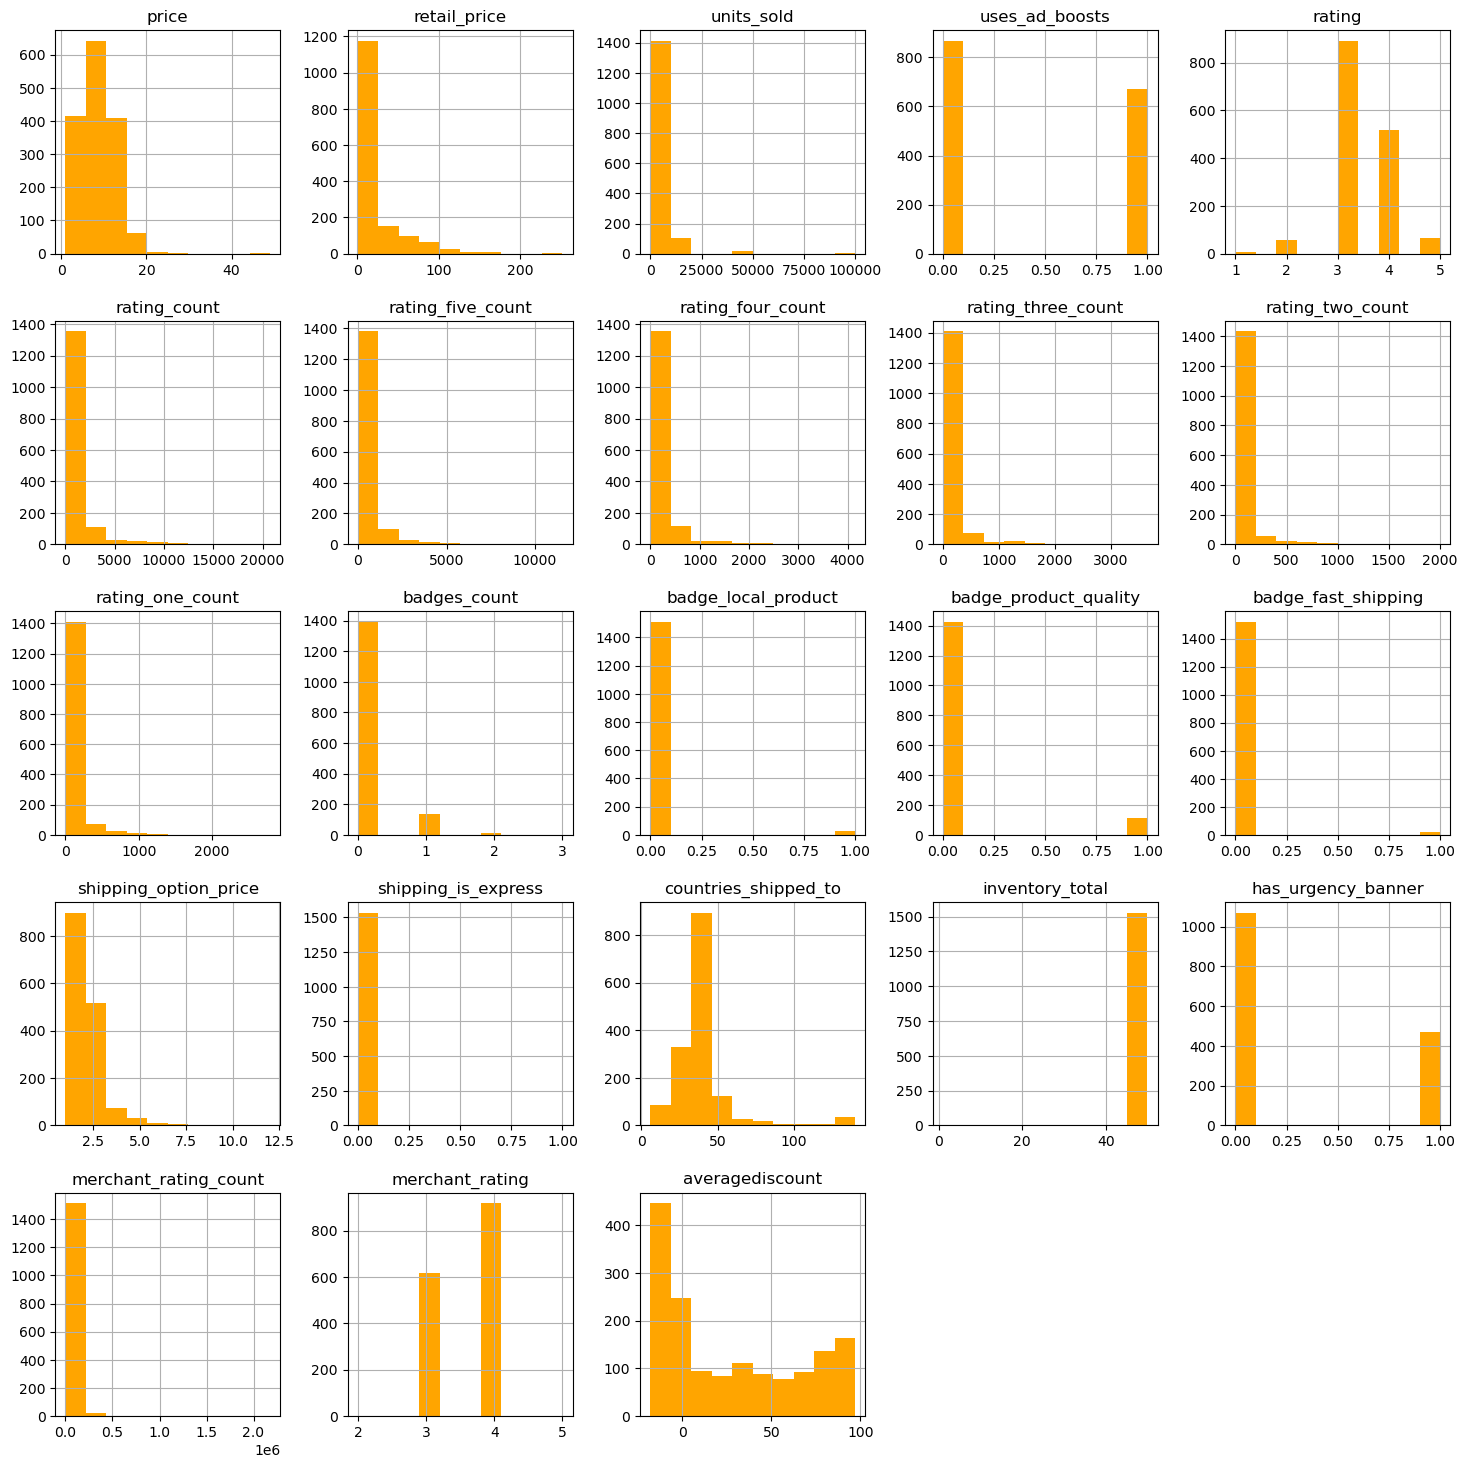

In [770]:
# Creating histogram
fig = df.hist(figsize = (18,18), color='orange')

<AxesSubplot:xlabel='retail_price', ylabel='units_sold'>

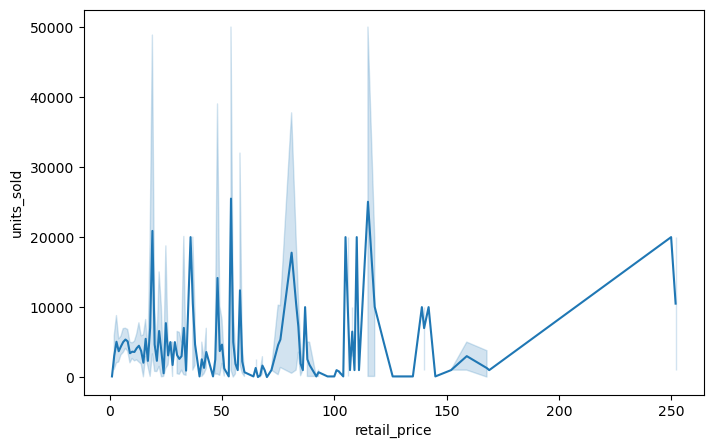

In [771]:
plt.figure(figsize=(8,5))

# Create a line chart to visualize how startup valuation changes over time
sns.lineplot(data=df, x="retail_price", y="units_sold")

<AxesSubplot:xlabel='averagediscount', ylabel='units_sold'>

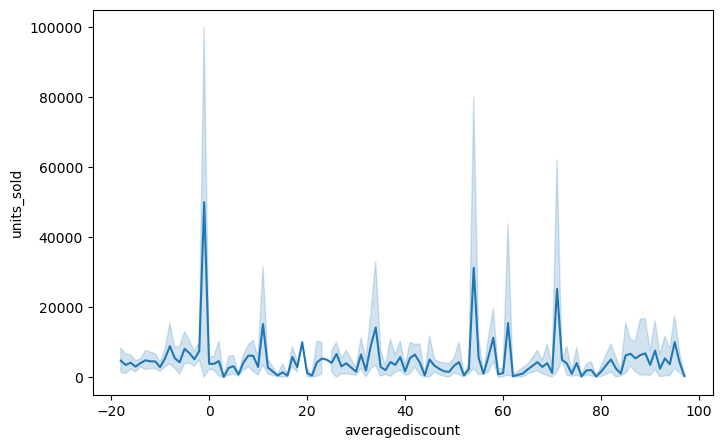

In [772]:
plt.figure(figsize=(8,5))

# Create a line chart to visualize how startup valuation changes over time
sns.lineplot(data=df, x="averagediscount", y="units_sold")

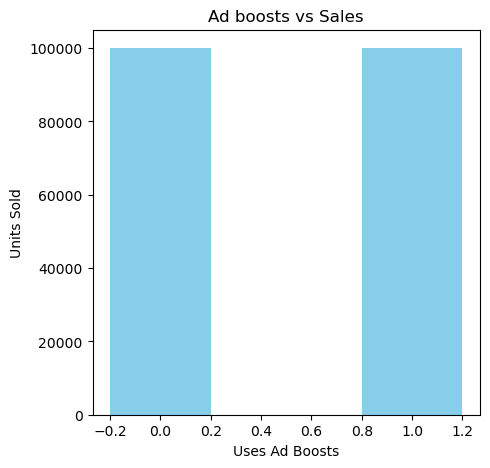

In [773]:
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(df['uses_ad_boosts'], df['units_sold'], color ='skyblue',
        width = 0.4)
 
plt.xlabel("Uses Ad Boosts")
plt.ylabel("Units Sold")
plt.title("Ad boosts vs Sales")
plt.show()

<AxesSubplot:ylabel='rating'>

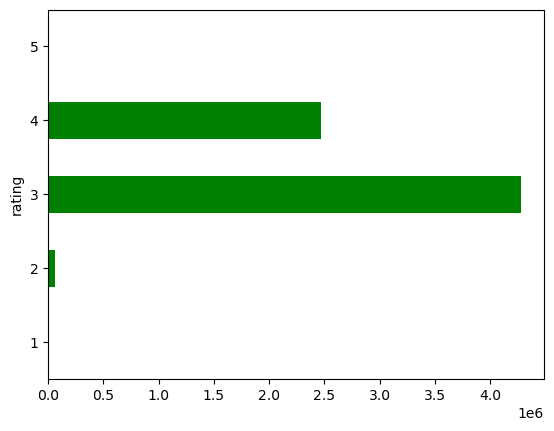

In [774]:
Total_sales_byRating = df.groupby("rating")["units_sold"].agg('sum')
Total_sales_byRating
Total_sales_byRating.plot.barh(color ='green')

<AxesSubplot:ylabel='merchant_rating'>

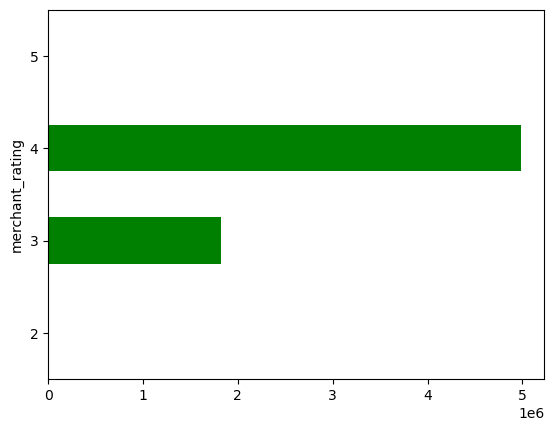

In [775]:
Total_sales_byRating = df.groupby("merchant_rating")["units_sold"].agg('sum')
Total_sales_byRating
Total_sales_byRating.plot.barh(color ='green')

column: price


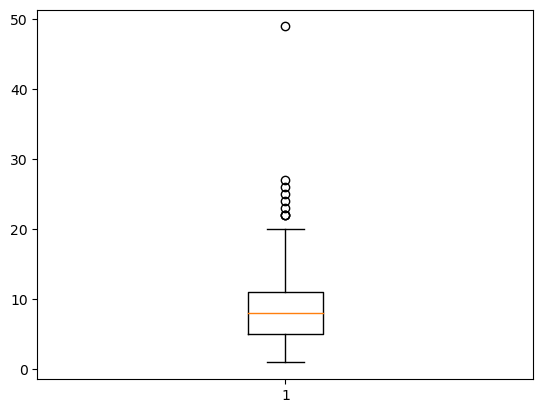

column: retail_price


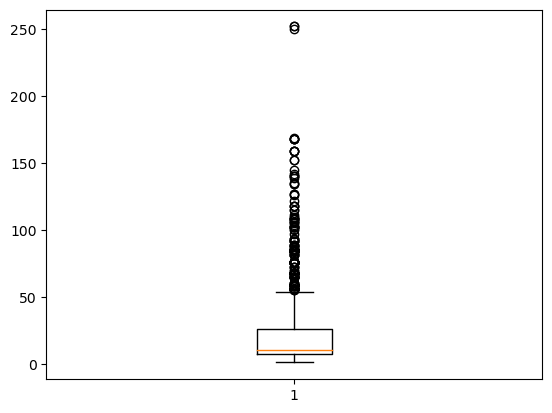

column: units_sold


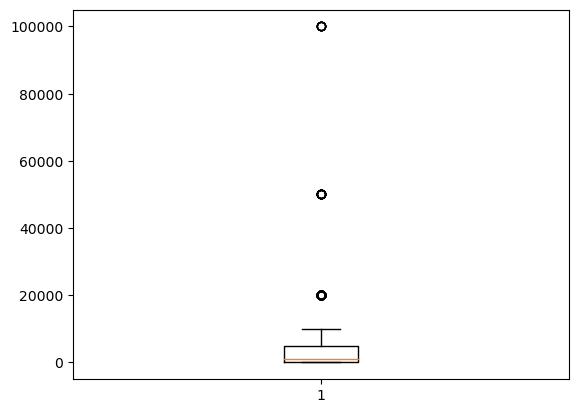

column: uses_ad_boosts


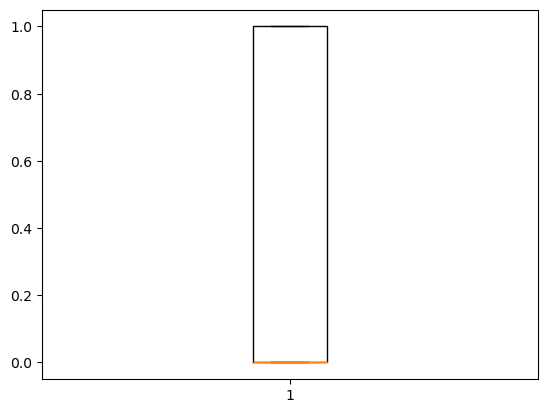

column: rating


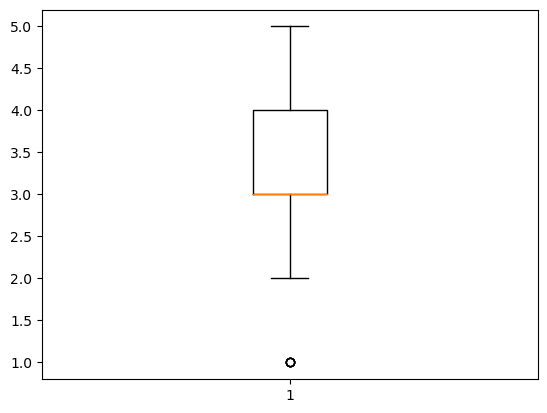

column: rating_count


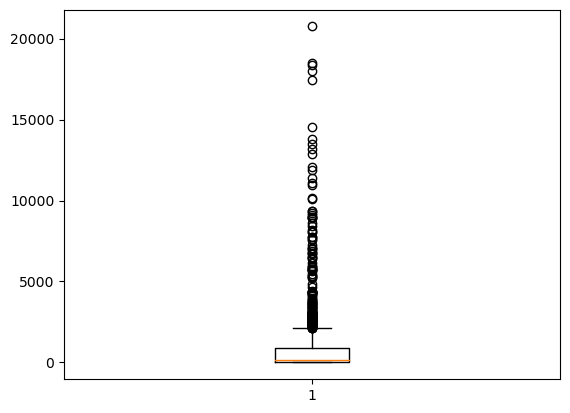

column: rating_five_count


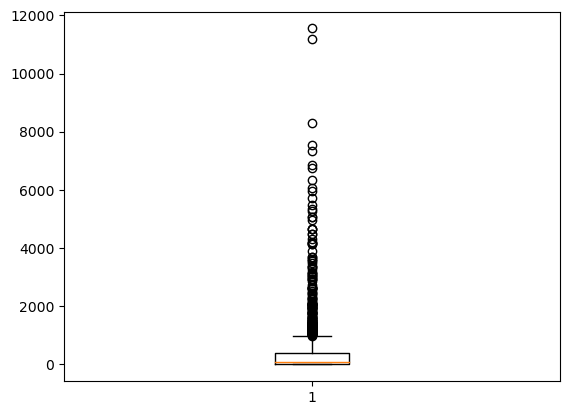

column: rating_four_count


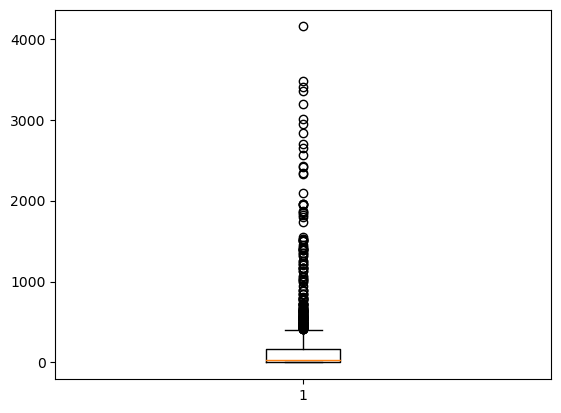

column: rating_three_count


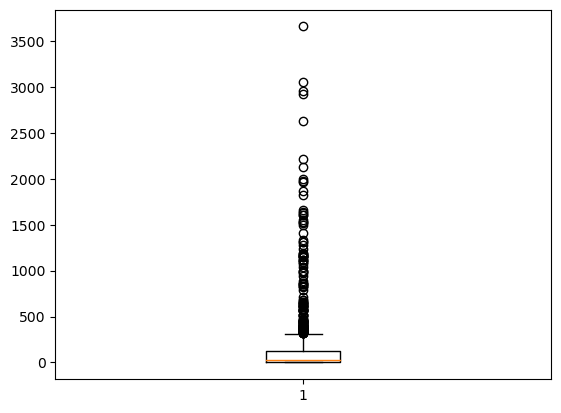

column: rating_two_count


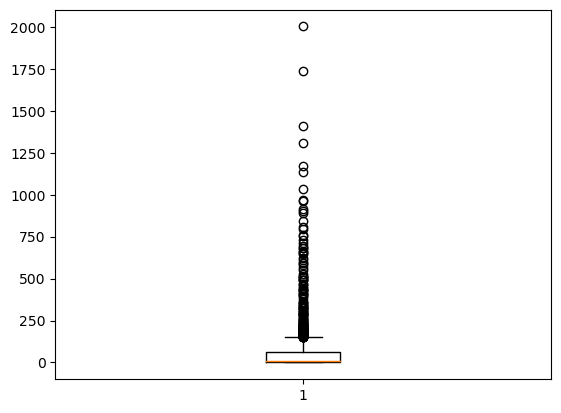

column: rating_one_count


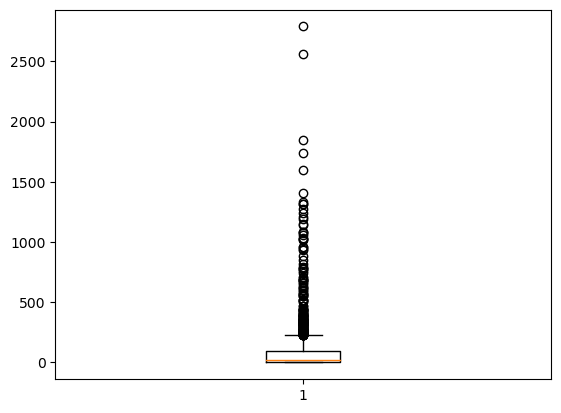

column: badges_count


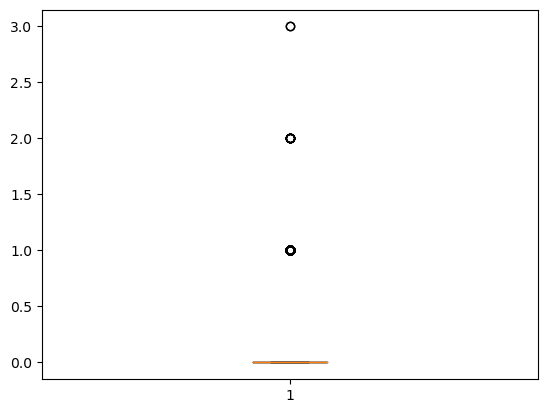

column: badge_local_product


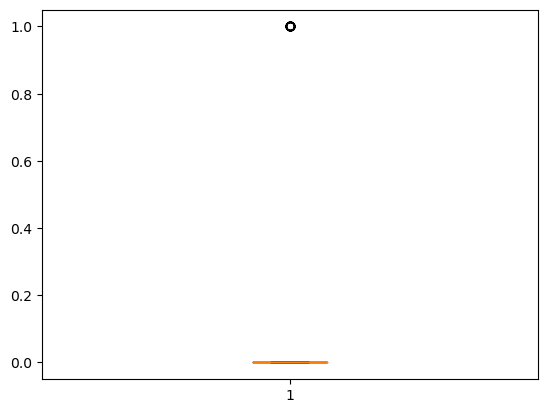

column: badge_product_quality


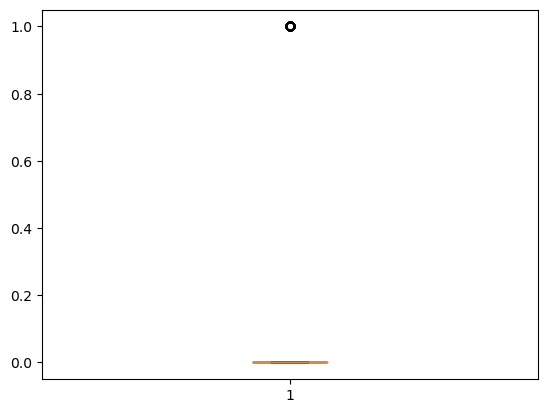

column: badge_fast_shipping


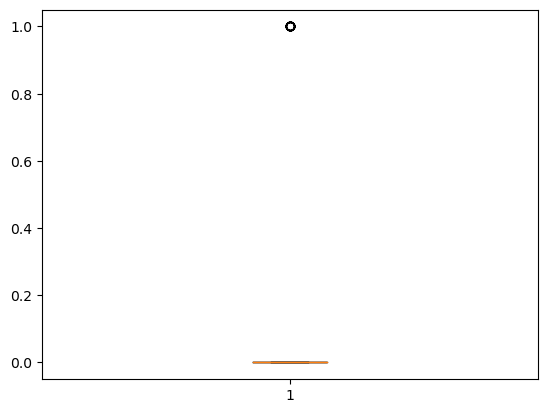

column: shipping_option_price


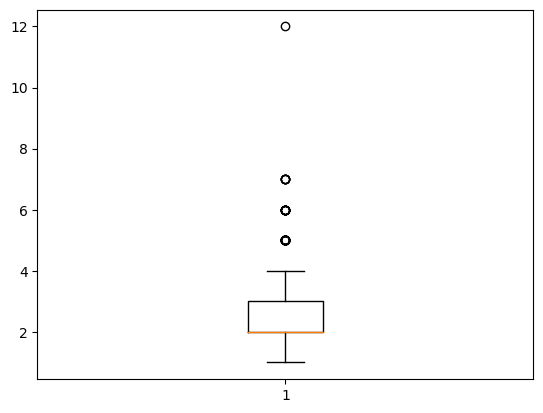

column: shipping_is_express


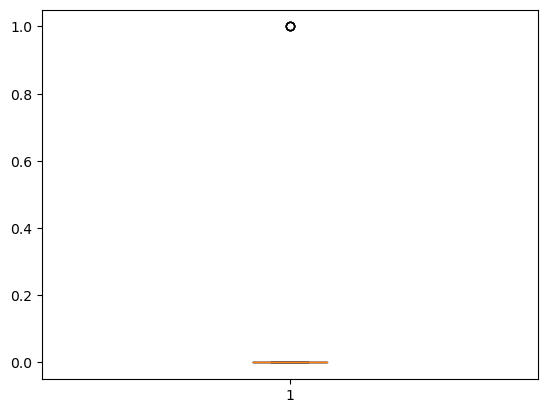

column: countries_shipped_to


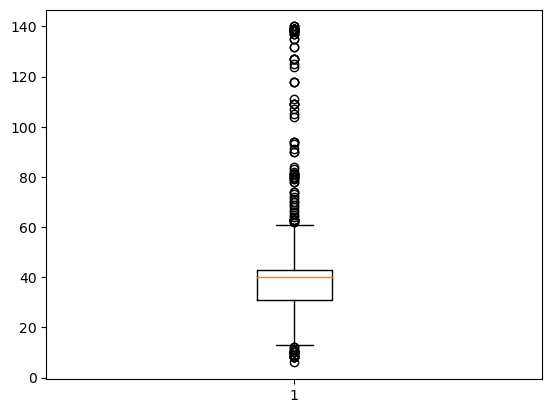

column: inventory_total


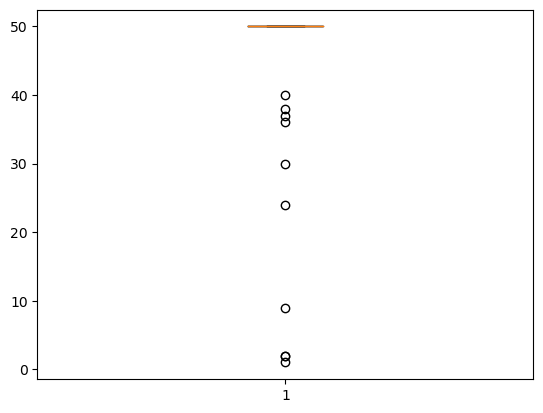

column: has_urgency_banner


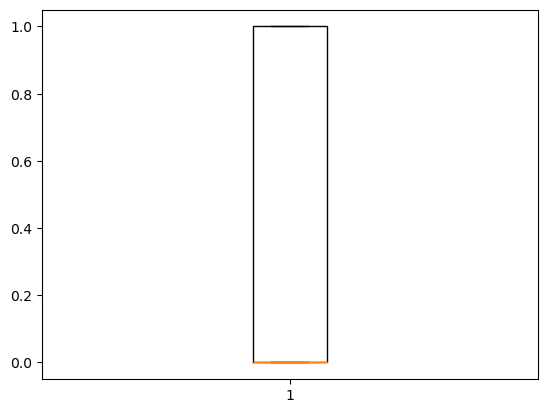

column: merchant_rating_count


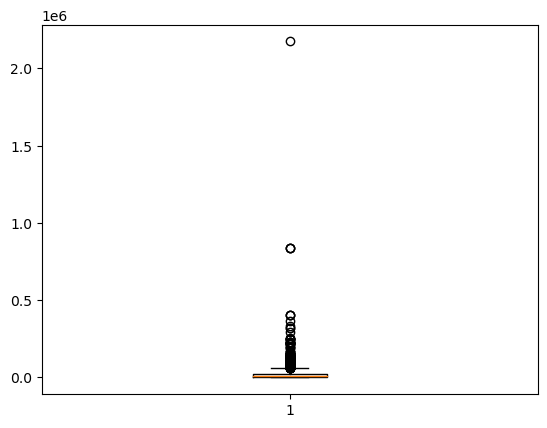

column: merchant_rating


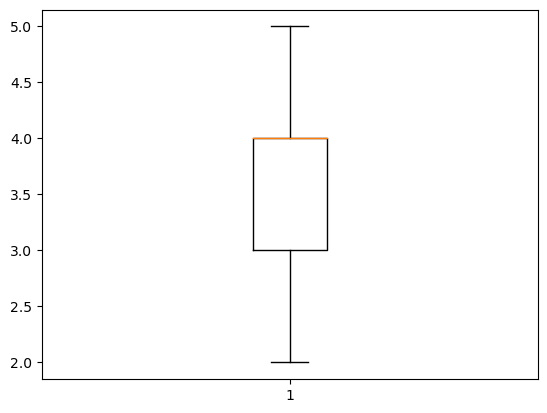

column: averagediscount


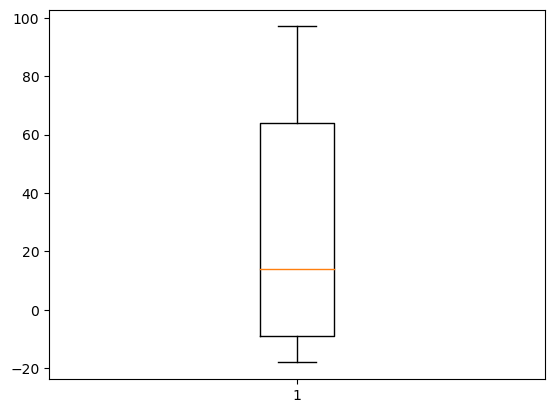

In [776]:
col = []
for k in df.columns:
    if df[k].dtype == 'int64' or  df[k].dtype == 'float':
        col.append(k)
for j in col:
    print("column:",j)
    plt.boxplot(df[j])
    plt.show()

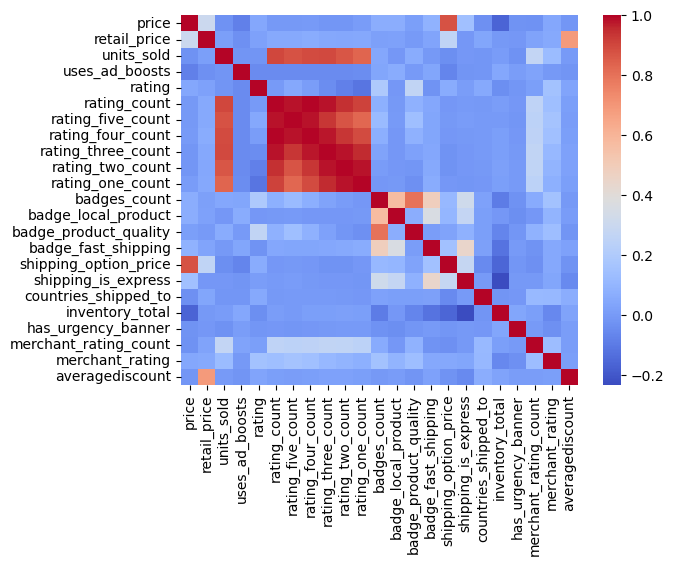

In [777]:
sub_sample_corr = df.corr()
##print(df.corr())
sns.heatmap(sub_sample_corr, cmap='coolwarm',annot_kws={'size':100})
plt.show()
## annot=True , annot_kws={'size':100} , annot=sub_sample_corr.rank(axis="columns")

# Removing Outliers:

In [778]:
# Calculate z-scores for each column
z_scores = np.abs(stats.zscore(encoded_df))
threshold = 3

In [785]:
# Identify rows with outliers
outlier_indices = np.where(z_scores > threshold)[0]
# Remove rows with outliers using .iloc
filtered_df = encoded_df.drop(index=df.index[outlier_indices])

In [786]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   price                  1218 non-null   int64
 1   retail_price           1218 non-null   int64
 2   units_sold             1218 non-null   int64
 3   uses_ad_boosts         1218 non-null   int64
 4   rating                 1218 non-null   int64
 5   rating_count           1218 non-null   int64
 6   rating_five_count      1218 non-null   int64
 7   rating_four_count      1218 non-null   int64
 8   rating_three_count     1218 non-null   int64
 9   rating_two_count       1218 non-null   int64
 10  rating_one_count       1218 non-null   int64
 11  badges_count           1218 non-null   int64
 12  badge_local_product    1218 non-null   int64
 13  badge_product_quality  1218 non-null   int64
 14  badge_fast_shipping    1218 non-null   int64
 15  shipping_option_price  1218 non-null  

# Step 6: Creating Feature Set(X) and Outcome Variable(Y)

In [789]:
X = sm.add_constant(filtered_df)
Y = filtered_df['retail_price']

# Step 7: Split Training and Testing Data

In [790]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,
                                train_size = 0.8,
                                random_state=42)

# Step 8: Scaling: 

In [791]:
transform = ColumnTransformer(transformers=[
    ('c1',StandardScaler(),['uses_ad_boosts']),
    ('c2',StandardScaler(),['rating']),
    ('c3',StandardScaler(),['has_urgency_banner']),
    ('c4',StandardScaler(),['merchant_rating']),
    ('c5',StandardScaler(),['averagediscount']),
    ('c6',RobustScaler(),['price']),
    ('c7',RobustScaler(),['units_sold']),
    ('c8',RobustScaler(),['rating_count']),
    ('c9',RobustScaler(),['rating_five_count']),
    ('c10',RobustScaler(),['rating_four_count']),
    ('c11',RobustScaler(),['rating_three_count']),
    ('c12',RobustScaler(),['rating_two_count']),
    ('c13',RobustScaler(),['rating_one_count']),
    ('c14',RobustScaler(),['badges_count']),
    ('c15',RobustScaler(),['badge_local_product']),
    ('c16',RobustScaler(),['badge_product_quality']),
    ('c17',RobustScaler(),['badge_fast_shipping']),
    ('c18',RobustScaler(),['shipping_option_price']),
    ('c19',RobustScaler(),['shipping_is_express']),
    ('c20',RobustScaler(),['countries_shipped_to']),
    ('c21',RobustScaler(),['inventory_total']),
    ('c22',RobustScaler(),['merchant_rating_count'])
],remainder = 'passthrough')

In [792]:
X_train_scl = transform.fit_transform(train_X)
X_test_scl = transform.transform(test_X)

# Step 9: Model Training & Testing

# (1) Linear Regression Model

In [793]:
import statsmodels.api as sm

In [794]:
## Fit linear regression model on training data
Linear_Reg_Model = sm.OLS( train_Y, X_train_scl ).fit()

In [795]:
##Print parameters i.e. B0 and Bns for Linear_Reg_Model
print(Linear_Reg_Model.params)

x1      -1.720846e-15
x2       7.799317e-15
x3      -2.220446e-16
x4       1.203898e-15
x5       1.110223e-16
x6       1.776357e-15
x7      -3.774758e-15
x8       1.221245e-15
x9       3.552714e-15
x10      3.996803e-15
x11     -5.995204e-15
x12     -6.772360e-15
x13      1.554312e-15
const   -3.142296e-18
x14      3.489632e-18
x15     -1.584287e-18
x16      3.856645e-21
x17      2.220446e-16
x18      0.000000e+00
x19     -2.997602e-15
x20      0.000000e+00
x21      9.436896e-16
x22      1.000000e+00
x23      1.998401e-15
x24      0.000000e+00
x25      0.000000e+00
x26      0.000000e+00
x27      0.000000e+00
dtype: float64


## Model Diagnostics

In [796]:
Linear_Reg_Model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     1.000      
Dependent Variable: retail_price     AIC:                -58169.1370
Date:               2023-08-29 02:48 BIC:                -58086.1530
No. Observations:   974              Log-Likelihood:     29102.     
Df Model:           16               F-statistic:        4.717e+31  
Df Residuals:       957              Prob (F-statistic): 0.00       
R-squared:          1.000            Scale:              6.6545e-28 
--------------------------------------------------------------------
       Coef.  Std.Err.           t            P>|t|   [0.025  0.975]
--------------------------------------------------------------------
x1    -0.0000   0.0000                -2.0316 0.0425 -0.0000 -0.0000
x2     0.0000   0.0000                 8.8374 0.0000  0.0000  0.0000
x3    -0.0000   0.0000                -0.2672 0.7894 -0.0000  0.0000
x4     0.0000   0.0000                 1.4023 0.1611 -0.0000  0.0000
x5     0.0000   0.0000                 0.0852 0.9321 -0.0000  0.0000
x6     0.0000   0.0000                 0.6207 0.5349 -0.0000  0.0000
x7    -0.0000   0.0000                -1.9240 0.0547 -0.0000  0.0000
x8     0.0000   0.0000                 1.6131 0.1071 -0.0000  0.0000
x9     0.0000   0.0000                 1.1466 0.2518 -0.0000  0.0000
x10    0.0000   0.0000                 0.7100 0.4779 -0.0000  0.0000
x11   -0.0000   0.0000                -0.9680 0.3333 -0.0000  0.0000
x12   -0.0000   0.0000                -1.3932 0.1639 -0.0000  0.0000
x13    0.0000   0.0000                 0.5665 0.5712 -0.0000  0.0000
const -0.0000   0.0000    -4254274155582.2388 0.0000 -0.0000 -0.0000
x14    0.0000   0.0000     7087593273451.8340 0.0000  0.0000  0.0000
x15   -0.0000   0.0000    -1772378617985.0640 0.0000 -0.0000 -0.0000
x16    0.0000   0.0000        4355993018.6568 0.0000  0.0000  0.0000
x17    0.0000   0.0000                 0.1189 0.9053 -0.0000  0.0000
x18    0.0000   0.0000                    nan    nan  0.0000  0.0000
x19   -0.0000   0.0000                -3.0567 0.0023 -0.0000 -0.0000
x20    0.0000   0.0000                    nan    nan  0.0000  0.0000
x21    0.0000   0.0000                 1.7819 0.0751 -0.0000  0.0000
x22    1.0000   0.0000 16596255565287312.0000 0.0000  1.0000  1.0000
x23    0.0000   0.0000                 1.2271 0.2201 -0.0000  0.0000
x24    0.0000   0.0000                    nan    nan  0.0000  0.0000
x25    0.0000   0.0000                    nan    nan  0.0000  0.0000
x26    0.0000   0.0000                    nan    nan  0.0000  0.0000
x27    0.0000   0.0000                    nan    nan  0.0000  0.0000
--------------------------------------------------------------------
Omnibus:           190.840    Durbin-Watson:       1.259            
Prob(Omnibus):     0.000      Jarque-Bera (JB):    359.461          
Skew:              1.158      Prob(JB):            0.000            
Kurtosis:          4.869      Condition No.:       10058208169379478
====================================================================
* The condition number is large (1e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

In [797]:
# Coefficient of Determation(R Squared):-  1.0 (Should be close to 1)
# Model Significance (p-value of F-Test/ANOVA):-  0.0 (p-value < 0.05)
# Autocorrelation (Durbin-Watson Value):-  1.7 (Should be close to 2)
# Data Distribution (Jarque-Bera (JB)):-  42756.998 (Should be close to 0) Here it is not normaly distributed

## Check Multicolinearity

In [807]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [808]:
X_features = filtered_df.columns

In [809]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,price,4.442120
1,retail_price,2.814623
2,units_sold,5.584050
3,uses_ad_boosts,1.032575
4,rating,1.152256
5,rating_count,inf
6,rating_five_count,inf
7,rating_four_count,inf
8,rating_three_count,inf
9,rating_two_count,inf


In [810]:
columns_with_large_vif = vif_factors[vif_factors['VIF'] > 4]['Features']
columns_with_large_vif

0                     price
2                units_sold
5              rating_count
6         rating_five_count
7         rating_four_count
8        rating_three_count
9          rating_two_count
10         rating_one_count
15    shipping_option_price
Name: Features, dtype: object

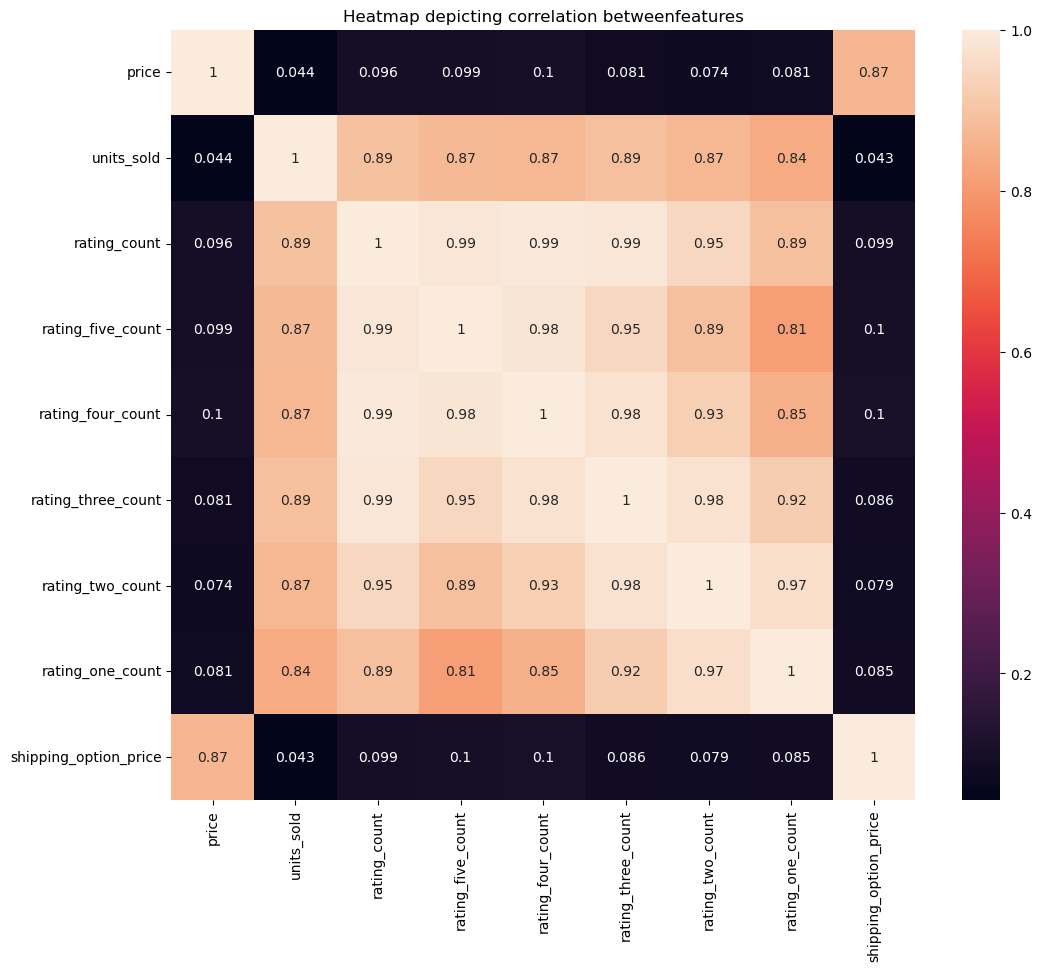

In [811]:
plt.figure( figsize = (12,10) )
sns.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title('Heatmap depicting correlation betweenfeatures');

In [803]:
# From above heatmap Groups of corelated features :-

# price and shipping_option_price
# units_sold, rating, rating_count, rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count

In [812]:
columns_to_be_removed = ['shipping_option_price', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count',
                        'rating_two_count', 'rating_one_count']

In [868]:
X_new_features = list( set(X_features) - set(columns_to_be_removed))
X_new_features

['rating',
 'badges_count',
 'countries_shipped_to',
 'origin_country_SG',
 'badge_local_product',
 'origin_country_CN',
 'has_urgency_banner',
 'price',
 'averagediscount',
 'units_sold',
 'badge_product_quality',
 'origin_country_GB',
 'retail_price',
 'uses_ad_boosts',
 'badge_fast_shipping',
 'origin_country_VE',
 'inventory_total',
 'merchant_rating_count',
 'shipping_is_express',
 'merchant_rating',
 'origin_country_US']

In [814]:
get_vif_factors( X[X_new_features] )

C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,rating,1.031858
1,badges_count,NaN
2,countries_shipped_to,1.061581
3,origin_country_SG,NaN
4,badge_local_product,NaN
5,origin_country_CN,0.000000
6,has_urgency_banner,1.007497
7,price,1.338658
8,averagediscount,2.546548
9,units_sold,1.066410


## Building a New Model after Removing Multi-collinearity

In [816]:
train_X = train_X[X_new_features]

In [817]:
Linear_Reg_Model2 = sm.OLS(train_Y, train_X).fit()

In [818]:
Linear_Reg_Model2.summary2()

C:\Users\Kaustubh Shinde\Anaconda3.0\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          1.000      
Dependent Variable:      retail_price          AIC:                     -54336.5294
Date:                    2023-08-29 02:54      BIC:                     -54282.8339
No. Observations:        974                   Log-Likelihood:          27179.     
Df Model:                10                    F-statistic:             1.466e+30  
Df Residuals:            963                   Prob (F-statistic):      0.00       
R-squared:               1.000                 Scale:                   3.4250e-26 
-----------------------------------------------------------------------------------
                       Coef.  Std.Err.           t           P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------------
rating                -0.0000   0.0000               -0.4099 0.6820 -0.0000  0.0000
badges_count          -0.0000   0.0000   -1204458458811.4714 0.0000 -0.0000 -0.0000
countries_shipped_to   0.0000   0.0000                0.6959 0.4867 -0.0000  0.0000
origin_country_SG     -0.0000   0.0000    -318121993921.8475 0.0000 -0.0000 -0.0000
badge_local_product   -0.0000   0.0000   -4459125604839.0957 0.0000 -0.0000 -0.0000
origin_country_CN     -0.0000   0.0000               -1.4110 0.1586 -0.0000  0.0000
has_urgency_banner    -0.0000   0.0000               -0.4901 0.6242 -0.0000  0.0000
price                  0.0000   0.0000                0.7981 0.4250 -0.0000  0.0000
averagediscount        0.0000   0.0000                0.7739 0.4392 -0.0000  0.0000
units_sold             0.0000   0.0000               21.8310 0.0000  0.0000  0.0000
badge_product_quality  0.0000   0.0000      18869940916.8752 0.0000  0.0000  0.0000
origin_country_GB      0.0000   0.0000                   nan    nan  0.0000  0.0000
retail_price           1.0000   0.0000 2327597091441445.5000 0.0000  1.0000  1.0000
uses_ad_boosts         0.0000   0.0000                0.0274 0.9781 -0.0000  0.0000
badge_fast_shipping    0.0000   0.0000                   nan    nan  0.0000  0.0000
origin_country_VE      0.0000   0.0000                   nan    nan  0.0000  0.0000
inventory_total       -0.0000   0.0000               -0.0827 0.9341 -0.0000  0.0000
merchant_rating_count -0.0000   0.0000              -24.9740 0.0000 -0.0000 -0.0000
shipping_is_express    0.0000   0.0000                   nan    nan  0.0000  0.0000
merchant_rating        0.0000   0.0000                0.1876 0.8513 -0.0000  0.0000
origin_country_US      0.0000   0.0000                   nan    nan  0.0000  0.0000
-----------------------------------------------------------------------------------
Omnibus:                   226.522            Durbin-Watson:               2.081   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            1386.124
Skew:                      0.914              Prob(JB):                    0.000   
Kurtosis:                  8.551              Condition No.:               inf     
===================================================================================
* The condition number is large (inf). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Residual Analysis

In [819]:
# To check errors are normally distributed or not

<Figure size 800x600 with 0 Axes>

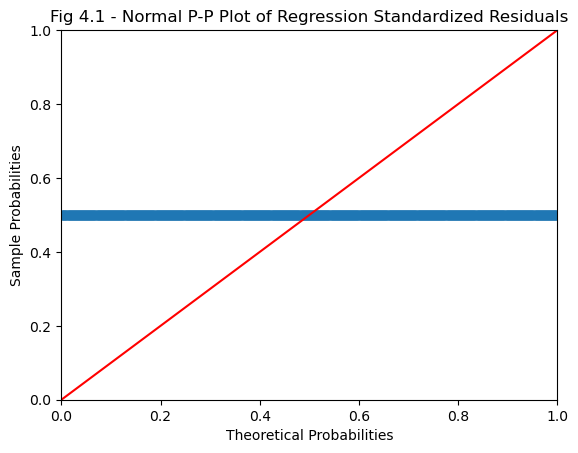

In [820]:
Linear_Reg_Model_resid = Linear_Reg_Model.resid
probplot = sm.ProbPlot( Linear_Reg_Model_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [821]:
# Since the dots(blue) are not close to the diagonal line(red), we can conclude that the residuals not following normal distribution

## Test of Homoscedasticity

In [822]:
# Scattered Points: Homo (should have)
# Tunnel shape : Hetero

In [823]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

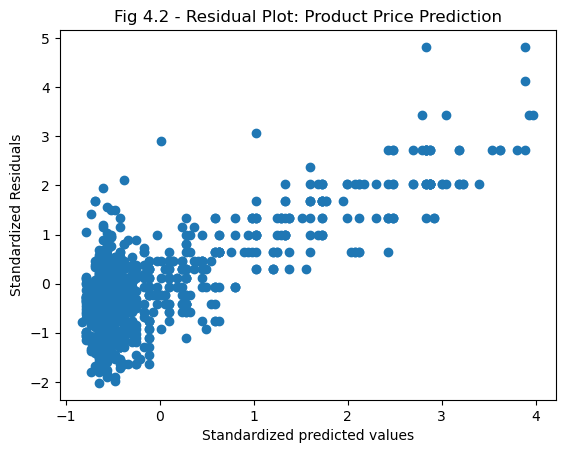

In [824]:
plt.scatter( get_standardized_values( Linear_Reg_Model.fittedvalues ), 
            get_standardized_values( Linear_Reg_Model_resid ) )
plt.title( "Fig 4.2 - Residual Plot: Product Price Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

## Predict Y

In [825]:
pred_y = Linear_Reg_Model.predict(test_X)
pred_y

677     6.900000e+01
314    -1.700000e+01
49     -1.000000e+01
1304    7.800000e+01
731    -1.500000e+01
            ...     
529    -1.558439e-12
296     8.600000e+01
73      1.800000e+01
1383   -1.006325e-12
78      1.800000e+01
Length: 244, dtype: float64

## Accuracy

In [826]:
mse = mean_squared_error(test_Y, pred_y)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 24.794896354812717


In [827]:
# You can also print other evaluation metrics like R-squared
r_squared = Linear_Reg_Model.rsquared
print("R-squared:", r_squared)

R-squared: 1.0


# *
R-squared value of 1.0 for the training as well as testing dataset. This can be a sign of overfitting, where the model has learned the noise in the training data and is not likely to generalize well to new, unseen data. So, lets do regularization

# 1A) LASSO Regression

In [872]:
from sklearn.linear_model import Lasso

# Applying alpha = 1 and running the algorithms for maximum of 500
lasso_df = Lasso(alpha = 0.01, max_iter = 500)

In [873]:
lasso_Model = lasso_df.fit(X_train_scl,train_Y)

## Predict Y

In [874]:
y_pred_lasso = lasso_Model.predict(X_test_scl)
y_pred_lasso

array([ 42.99954875,   5.00028571,  10.00018874,  67.99906391,
        13.00013056,   6.00026631,  11.00016935,  71.99898633,
         8.00022753,  11.00016935,   5.00028571,  13.00013056,
        48.99943239, 103.99836573,   8.00022753,   6.00026631,
        49.99941299,   7.00024692,   7.00024692,  58.99923845,
         8.00022753,  32.99974269,   7.00024692,  10.00018874,
        55.99929663,   2.00034389,  58.99923845,  10.00018874,
         7.00024692,  83.99875361,  29.99980087,  11.00016935,
        16.00007238,   4.0003051 ,   8.00022753,   8.00022753,
        47.99945178,  12.00014995,   6.00026631,  24.99989783,
         7.00024692,  64.99912209,  10.00018874,   8.00022753,
        11.00016935,   6.00026631,  11.00016935,  25.99987844,
        14.00011117,  46.99947117,   6.00026631,  66.9990833 ,
         4.0003051 ,  11.00016935,   7.00024692,   9.00020813,
         5.00028571,  10.00018874,   3.0003245 ,   5.00028571,
         6.00026631,  83.99875361,   7.00024692,   3.00

## Accuracy

In [875]:
mse = mean_squared_error(test_Y, y_pred_lasso)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.00046669525231212057


In [877]:
r_squared = r2_score(test_Y, y_pred_lasso)
print("R-squared:", r_squared)

R-squared: 0.9999999996231773


# 1B) Ridge Regression

In [880]:
from sklearn.linear_model import Ridge

# Applying alpha = 1 
ridge_df = Lasso(alpha = 1.0)

In [882]:
ridge_Model = ridge_df.fit(X_train_scl,train_Y)

## Predict Y

In [883]:
y_pred_ridge = ridge_Model.predict(X_test_scl)
y_pred_ridge

array([ 42.95487481,   5.02857086,  10.01887401,  67.90639057,
        13.0130559 ,   6.02663149,  11.01693464,  71.8986331 ,
         8.02275275,  11.01693464,   5.02857086,  13.0130559 ,
        48.9432386 , 103.83657327,   8.02275275,   6.02663149,
        49.94129923,   7.02469212,   7.02469212,  58.9238449 ,
         8.02275275,  32.97426851,   7.02469212,  10.01887401,
        55.92966301,   2.03438896,  58.9238449 ,  10.01887401,
         7.02469212,  83.87536066,  29.98008662,  11.01693464,
        16.00723779,   4.03051023,   8.02275275,   8.02275275,
        47.94517796,  12.01499527,   6.02663149,  24.98978346,
         7.02469212,  64.91220868,  10.01887401,   8.02275275,
        11.01693464,   6.02663149,  11.01693464,  25.9878441 ,
        14.01111653,  46.94711733,   6.02663149,  66.90832994,
         4.03051023,  11.01693464,   7.02469212,   9.02081338,
         5.02857086,  10.01887401,   3.0324496 ,   5.02857086,
         6.02663149,  83.87536066,   7.02469212,   3.03

## Accuracy

In [884]:
mse = mean_squared_error(test_Y, y_pred_ridge)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.046669525231413864


In [885]:
r_squared = r2_score(test_Y, y_pred_ridge)
print("R-squared:", r_squared)

R-squared: 0.9999962317728699


# (2) Decision Tree Model

In [828]:
from sklearn.tree import DecisionTreeRegressor

DT_df = DecisionTreeRegressor(criterion = 'squared_error', min_samples_split=20, max_depth=5)

In [829]:
DT_model = DT_df.fit(X_train_scl,train_Y)

## Predict Y

In [830]:
dt_pred_y = DT_model.predict(X_test_scl)
dt_pred_y

array([ 42.42105263,   4.69072165,   9.70967742,  66.78571429,
        13.5106383 ,   6.        ,  11.20253165,  75.06666667,
         7.35393258,  11.20253165,   4.69072165,  13.5106383 ,
        50.05882353, 100.25      ,   7.35393258,   6.        ,
        50.05882353,   7.35393258,   7.35393258,  59.        ,
         7.35393258,  33.47619048,   7.35393258,   9.70967742,
        55.7       ,   2.4       ,  59.        ,   9.70967742,
         7.35393258,  84.10344828,  30.        ,  11.20253165,
        15.92307692,   4.69072165,   7.35393258,   7.35393258,
        47.44444444,  11.20253165,   6.        ,  25.61904762,
         7.35393258,  66.78571429,   9.70967742,   7.35393258,
        11.20253165,   6.        ,  11.20253165,  25.61904762,
        13.5106383 ,  47.44444444,   6.        ,  66.78571429,
         4.69072165,  11.20253165,   7.35393258,   9.70967742,
         4.69072165,   9.70967742,   2.4       ,   4.69072165,
         6.        ,  84.10344828,   7.35393258,   2.4 

## Accuracy

In [831]:
mse = mean_squared_error(test_Y, dt_pred_y)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 1.0467022015786203


In [832]:
from sklearn.metrics import r2_score

r_squared = r2_score(test_Y, dt_pred_y)
print("R-squared:", r_squared)

R-squared: 0.9981045314555382


## Hyperparameter Tuning

In [833]:
from sklearn.model_selection import GridSearchCV

In [834]:
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [835]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_scl, train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [836]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_

## Predict Y after Tunning

In [837]:
dtt_pred_y = best_regressor.predict(X_test_scl)
dtt_pred_y

array([ 43.,   5.,  10.,  68.,  13.,   6.,  11.,  72.,   8.,  11.,   5.,
        13.,  49., 102.,   8.,   6.,  50.,   7.,   7.,  59.,   8.,  33.,
         7.,  10.,  56.,   2.,  59.,  10.,   7.,  84.,  30.,  11.,  16.,
         4.,   8.,   8.,  48.,  12.,   6.,  25.,   7.,  65.,  10.,   8.,
        11.,   6.,  11.,  26.,  14.,  47.,   6.,  67.,   4.,  11.,   7.,
         9.,   5.,  10.,   3.,   5.,   6.,  84.,   7.,   3.,  22.,  48.,
        58.,  37.,   7., 110.,  11.,  11.,  85.,   9.,   7.,  10.,  32.,
        12.,   9.,  43.,  11.,   6.,  34.,  65.,   5.,   7.,   7.,  30.,
        84.,   5.,  10.,   7.,  25.,   5.,   2.,  11.,  26.,  11.,  22.,
         8.,  26.,  51.,  17.,  10.,  13.,  10.,  22.,   9.,   6.,   4.,
        14.,   7.,   7.,   7.,  10.,   8.,  84.,   5.,   4.,   6.,   6.,
        65.,  12.,  34.,   3.,   7.,  10.,  48.,  26.,  12.,   8.,  65.,
        10.,  26.,  10.,   7.,   7.,   7.,  17.,  84.,   9.,   7.,   6.,
        68.,   7.,   8.,   2.,   5.,  10.,   5.,   

## Accuracy after Tunning

In [838]:
mse = mean_squared_error(test_Y, dtt_pred_y)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.2123251450326003


In [839]:
from sklearn.metrics import r2_score

r_squared = r2_score(test_Y, dtt_pred_y)
print("R-squared:", r_squared)

R-squared: 0.9999220038501154


# (3) Random Forest

In [886]:
from sklearn.ensemble import RandomForestRegressor

random_forest_df = RandomForestRegressor(n_estimators=100, random_state=42)

In [887]:
random_forest_Model = random_forest_df.fit(X_train_scl,train_Y)

## Predict Y

In [888]:
rf_y_pred = random_forest_Model.predict(X_test_scl)
rf_y_pred

array([ 42.98,   5.  ,  10.  ,  67.89,  13.  ,   6.  ,  11.  ,  72.07,
         8.  ,  11.  ,   5.  ,  13.  ,  48.95, 101.28,   8.  ,   6.  ,
        50.07,   7.  ,   7.  ,  59.  ,   8.  ,  33.01,   7.  ,  10.  ,
        56.  ,   2.  ,  59.01,  10.  ,   7.  ,  83.95,  29.97,  11.  ,
        16.  ,   4.  ,   8.  ,   8.  ,  48.05,  12.  ,   6.  ,  24.99,
         7.  ,  65.09,  10.  ,   8.  ,  11.  ,   6.  ,  11.  ,  26.  ,
        14.  ,  47.26,   6.  ,  67.09,   4.  ,  11.  ,   7.  ,   9.  ,
         5.  ,  10.  ,   3.  ,   5.  ,   6.  ,  83.99,   7.  ,   3.  ,
        22.  ,  47.94,  58.41,  36.37,   7.  , 108.  ,  11.  ,  11.  ,
        85.15,   9.  ,   7.  ,  10.  ,  30.89,  12.  ,   9.  ,  42.93,
        11.  ,   6.  ,  34.09,  65.25,   5.  ,   7.  ,   7.  ,  30.03,
        84.02,   5.  ,  10.  ,   7.  ,  24.98,   5.  ,   2.  ,  11.  ,
        26.04,  11.  ,  22.06,   8.  ,  26.  ,  50.88,  17.  ,  10.  ,
        13.  ,  10.  ,  22.04,   9.  ,   6.  ,   4.  ,  14.02,   7.  ,
      

## Accuracy

In [889]:
mse = mean_squared_error(test_Y, rf_y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.28965142985953324


In [890]:
r_squared = r2_score(test_Y, rf_y_pred)
print("R-squared:", r_squared)

R-squared: 0.9998548484560089


# (4) KNN Regression Model

In [846]:
from sklearn.neighbors import KNeighborsRegressor

knn_df = KNeighborsRegressor(n_neighbors = 6 , metric = 'euclidean')

In [847]:
knn_model = knn_df.fit(X_train_scl,train_Y)

## Predict Y

In [848]:
knn_y_pred = knn_model.predict(X_test_scl)
knn_y_pred

array([ 43.        ,   4.83333333,  10.        ,  67.5       ,
        13.16666667,   6.33333333,  10.5       ,  72.83333333,
         8.16666667,  11.        ,   5.5       ,  13.        ,
        48.83333333, 104.33333333,   7.33333333,   5.66666667,
        49.5       ,   7.5       ,   6.5       ,  58.66666667,
         8.5       ,  33.33333333,   7.16666667,   9.5       ,
        55.66666667,   2.5       ,  59.        ,  10.16666667,
         6.83333333,  84.        ,  31.66666667,  10.5       ,
        15.        ,   4.16666667,   7.5       ,   7.83333333,
        48.5       ,  11.83333333,   5.33333333,  24.83333333,
         7.5       ,  66.5       ,   9.5       ,   7.83333333,
        10.33333333,   6.16666667,  10.66666667,  25.83333333,
        13.33333333,  47.5       ,   7.        ,  67.        ,
         4.5       ,   8.66666667,   7.16666667,   9.16666667,
         6.33333333,   9.83333333,   2.83333333,   5.33333333,
         5.66666667,  84.33333333,   6.66666667,   3.33

## Accuracy

In [849]:
mse = mean_squared_error(test_Y, knn_y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.7108801850683197


In [850]:
r_squared = r2_score(test_Y, knn_y_pred)
print("R-squared:", r_squared)

R-squared: 0.9991256946733902


## Hyperparameter Tuning

In [851]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

In [852]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_scl, train_Y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [853]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_

## Predict Y after Tunning

In [854]:
knnt_pred_y = best_regressor.predict(X_test_scl)
knnt_pred_y

array([ 43.        ,   4.7809112 ,   9.97494709,  67.23003184,
        13.15960188,   6.39352526,  10.27450718,  72.43079668,
         7.75812853,  10.84854057,   5.47651925,  12.99837987,
        48.84317329, 104.82896383,   7.484681  ,   5.34772423,
        50.00886899,   7.76700878,   6.48013887,  58.6649318 ,
         8.58312387,  33.28931396,   7.4962969 ,   9.31846542,
        55.89326317,   2.511678  ,  59.        ,  10.14947824,
         6.83775617,  84.1435509 ,  31.71678143,  10.67543627,
        15.19121062,   4.15114083,   7.72623881,   7.81983782,
        48.25266251,  12.05194895,   4.98636659,  24.80908285,
         7.54623558,  66.57087227,   9.66247497,   7.89617238,
        10.19038581,   5.99309495,  10.55289748,  25.82578659,
        13.36991343,  47.33527412,   7.19891165,  67.26769084,
         4.81766579,   8.74351846,   7.17240951,   9.16959938,
         6.80033464,   9.76629791,   2.76732845,   5.38708164,
         5.52237815,  84.41604152,   6.7710323 ,   3.19

## Accuracy after Tunning

In [856]:
mse = mean_squared_error(test_Y, knnt_pred_y)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.6571807497399446


In [858]:
r_squared = r2_score(test_Y, knnt_pred_y)
print("R-squared:", r_squared)

R-squared: 0.9992527946489477


# (5) SVM Regression Model

In [860]:
from sklearn.svm import SVR

svm_df  = SVR(kernel='linear', C = 0.1)

In [861]:
svm_model = svm_df.fit(X_train_scl,train_Y)

## Predict Y

In [862]:
svm_y_pred = svm_model.predict(X_test_scl)
svm_y_pred

array([ 43.02877315,   5.09324909,  10.09204321,  67.98515941,
        13.08956453,   6.09617791,  11.08571938,  71.98156143,
         8.08823607,  11.0900781 ,   5.0956088 ,  13.08357147,
        49.01982257, 103.91327467,   8.09445029,   6.09509149,
        50.01268499,   7.0966561 ,   7.0929234 ,  59.00365166,
         8.09510181,  33.03805046,   7.10124414,  10.0911876 ,
        55.99700114,   2.09520701,  58.99757771,  10.09189849,
         7.09416921,  83.94631939,  30.05738771,  11.08874329,
        16.06783347,   4.09828531,   8.08890173,   8.09668779,
        48.01823329,  12.0868744 ,   6.09454029,  25.05651336,
         7.08193706,  64.98893409,  10.08531149,   8.08978071,
        11.09067809,   6.09031012,  11.09083138,  26.06139592,
        14.08839222,  47.01476283,   6.09907501,  66.99074895,
         4.08739816,  11.08525055,   7.08907764,   9.09158975,
         5.08466211,  10.08492198,   3.09161371,   5.09332915,
         6.09522824,  83.95194773,   7.09826041,   3.09

## Accuracy

In [863]:
mse = mean_squared_error(test_Y, svm_y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.08110315889097384


In [864]:
r_squared = r2_score(test_Y, svm_y_pred)
print("R-squared:", r_squared)

R-squared: 0.9999886199060838
